# CSC604 Advanced programming and AI frameworks
# Assigment 2

### Name: Abeer AL-Talib


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Part 1

Consider the following Python dictionary data and Python list labels:

In [2]:
data = {'author': ['Ahmad', 'Ahmad', 'Majed', 'Sami', 'Ahmad', 'Ahmad', 'Majed', 'Ahmad', 'Sami', 'Sami'],
        'impact_factor': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'downloads': [3, 13, 2, 3, 5, 3, 7, 1, 24, 4],
        'type': ['journal', 'journal', 'conference', 'journal', 'conference', 'conference', 'conference', 'journal', 'conference', 'conference']}

1- Create a DataFrame df from this dictionary data above

In [3]:
df = pd.DataFrame(data)
df

,author,impact_factor,downloads,type
0,Ahmad,2.5,3,journal
1,Ahmad,3.0,13,journal
2,Majed,0.5,2,conference
3,Sami,NaN,3,journal
4,Ahmad,5.0,5,conference
5,Ahmad,2.0,3,conference
6,Majed,4.5,7,conference
7,Ahmad,NaN,1,journal
8,Sami,7.0,24,conference
9,Sami,3.0,4,conference


2- 
- Run basic calculations to obtain number of unique authors.

- Display the summary data frame

In [4]:
print(df["author"].unique())
print(df.info())
# print(df.describe())

['Ahmad' 'Majed' 'Sami']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   author         10 non-null     object 
 1   impact_factor  8 non-null      float64
 2   downloads      10 non-null     int64  
 3   type           10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 448.0+ bytes
None


3- Return the first 4 rows of the DataFrame df.

In [5]:
print(df.head(4))

  author  impact_factor  downloads        type
0  Ahmad            2.5          3     journal
1  Ahmad            3.0         13     journal
2  Majed            0.5          2  conference
3   Sami            NaN          3     journal


4- Select just the 'author' and 'impact_factor' columns from the DataFrame df.

In [6]:
print( df[['author', 'impact_factor']])
df.iloc[:, [0,1]]

  author  impact_factor
0  Ahmad            2.5
1  Ahmad            3.0
2  Majed            0.5
3   Sami            NaN
4  Ahmad            5.0
5  Ahmad            2.0
6  Majed            4.5
7  Ahmad            NaN
8   Sami            7.0
9   Sami            3.0


,author,impact_factor
0,Ahmad,2.5
1,Ahmad,3.0
2,Majed,0.5
3,Sami,NaN
4,Ahmad,5.0
5,Ahmad,2.0
6,Majed,4.5
7,Ahmad,NaN
8,Sami,7.0
9,Sami,3.0


5- Select the data in rows [2, 4, 7] and in columns ['author', 'impact_factor'].


In [7]:
df.iloc[[2,4,7], [0,1]]

,author,impact_factor
2,Majed,0.5
4,Ahmad,5.0
7,Ahmad,NaN


6- Select only the rows where the number of downloads is greater than 5.

In [8]:
print(df.loc[df['downloads'] > 5])

  author  impact_factor  downloads        type
1  Ahmad            3.0         13     journal
6  Majed            4.5          7  conference
8   Sami            7.0         24  conference


7- Select the rows where the impact_factor is missing, i.e. it is NaN.

In [9]:
print(df[df['impact_factor'].isnull()])


  author  impact_factor  downloads     type
3   Sami            NaN          3  journal
7  Ahmad            NaN          1  journal


8- Select the rows where the author is a Ahmad and the downloads is less than 4.

In [10]:
print(df[(df['author'] == 'Ahmad') & (df['downloads'] < 4)])


  author  impact_factor  downloads        type
0  Ahmad            2.5          3     journal
5  Ahmad            2.0          3  conference
7  Ahmad            NaN          1     journal


9- Select the rows the downloads is between 2 and 5 (hint: read about between function)

In [11]:
print(df[df['downloads'].between(2, 5)])


  author  impact_factor  downloads        type
0  Ahmad            2.5          3     journal
2  Majed            0.5          2  conference
3   Sami            NaN          3     journal
4  Ahmad            5.0          5  conference
5  Ahmad            2.0          3  conference
9   Sami            3.0          4  conference


 10- Calculate the sum of all downloads in df (i.e. the total number of downloads).

In [12]:
Total = df['downloads'].sum()
print(Total)


65


11- Calculate the mean downloads for each different author in df.

In [49]:
# check
a=df.groupby(['author'])['downloads'].agg(lambda x: x.unique().mean())
a


author
Ahmad     5.500000
Majed     4.500000
Sami     10.333333
Name: downloads, dtype: float64

12-  Count the number of each type of paper (journal or conference) in df.

In [36]:
paper_counts=df["type"].value_counts()
print(paper_counts)


conference    6
journal       4
Name: type, dtype: int64


13- Plot a bar chart with the different authors. 

<AxesSubplot:>

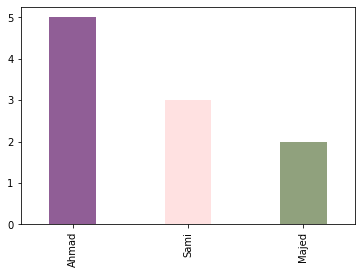

In [32]:
df['author'].value_counts().plot.bar(color=[  '#905E96', '#FFE1E1', '#90A17D'], width = 0.4)

14- Percentage of each type of paper

In [57]:
p=df['type'].value_counts(normalize=True)
p

conference    0.6
journal       0.4
Name: type, dtype: float64

15- Establish bins for downloads (bins=3) 

In [59]:
b=df['downloads'].value_counts(bins=3)
b

(0.976, 8.667]     8
(8.667, 16.333]    1
(16.333, 24.0]     1
Name: downloads, dtype: int64

16- Group by author . Perform calculations, total downloads for each group

In [48]:
g=df.groupby('author')['downloads'].sum()
print(g)

author
Ahmad    25
Majed     9
Sami     31
Name: downloads, dtype: int64


17- Sort the dataframe by number of downloads in descending order

In [55]:
s=df.sort_values(by="downloads", ascending=False)
s

,author,impact_factor,downloads,type
8,Sami,7.0,24,conference
1,Ahmad,3.0,13,journal
6,Majed,4.5,7,conference
4,Ahmad,5.0,5,conference
9,Sami,3.0,4,conference
0,Ahmad,2.5,3,journal
3,Sami,NaN,3,journal
5,Ahmad,2.0,3,conference
2,Majed,0.5,2,conference
7,Ahmad,NaN,1,journal


18-  Check for NaN under only type column:

In [60]:
c=df['type'].isnull().values.any()
c

False

19- replace type the paper to 0 if type is journal and 1 if the type is conference

In [64]:
r=df.replace({'type' : { "journal" : 0, "conference" : 1}})
r

,author,impact_factor,downloads,type
0,Ahmad,2.5,3,0
1,Ahmad,3.0,13,0
2,Majed,0.5,2,1
3,Sami,NaN,3,0
4,Ahmad,5.0,5,1
5,Ahmad,2.0,3,1
6,Majed,4.5,7,1
7,Ahmad,NaN,1,0
8,Sami,7.0,24,1
9,Sami,3.0,4,1


20- save the datafrom as csv with name 'hw3.csv'

In [65]:
df.to_csv("hw3.csv")

# ----------------------------

In [14]:
df1 = pd.DataFrame({'letter': list('rrrbbfrrbfffbbf'), 
                   'reads': [123,345,34,1,45,14,4,52,54,23,235,21,57,3,87]})


In [15]:
df1

,letter,reads
0,r,123
1,r,345
2,r,34
3,b,1
4,b,45
5,f,14
6,r,4
7,r,52
8,b,54
9,f,23


21- For each group of letter , find the sum of the three greatest values. (hint: read about nlargest())

In [73]:
g3=df1.groupby('letter')['reads'].apply(lambda sl: sl.nlargest(3).sum())
g3

letter
b    156
f    345
r    520
Name: reads, dtype: int64

In [16]:
import numpy as np
df2 = pd.DataFrame(data=np.random.randint(1, 101, size=(20, 4)), columns = ['A', 'B', 'C', 'D'])

In [17]:
df2

,A,B,C,D
0,33,30,90,29
1,46,45,63,60
2,1,52,57,64
3,82,56,97,60
4,14,21,9,59
5,48,34,7,35
6,87,35,53,56
7,7,50,68,19
8,2,94,12,92
9,86,9,9,91


22- drop only columns A and C 

In [47]:
df3=df2.drop(columns=['A','C'])
df3

,B,D
0,30,29
1,45,60
2,52,64
3,56,60
4,21,59
5,34,35
6,35,56
7,50,19
8,94,92
9,9,91


23- change any value >80 in the dataframe above to NaN

In [78]:
n=df2.mask(df2 > 80)
n


,A,B,C,D
0,33.0,30.0,NaN,29.0
1,46.0,45.0,63.0,60.0
2,1.0,52.0,57.0,64.0
3,NaN,56.0,NaN,60.0
4,14.0,21.0,9.0,59.0
5,48.0,34.0,7.0,35.0
6,NaN,35.0,53.0,56.0
7,7.0,50.0,68.0,19.0
8,2.0,NaN,12.0,NaN
9,NaN,9.0,9.0,NaN


In [18]:
import numpy as np
df4 = pd.DataFrame(data=np.random.randint(55, 101, size=(30, 1)),columns= ['Grade'])

In [19]:
df4

,Grade
0,89
1,87
2,83
3,88
4,71
5,79
6,85
7,82
8,89
9,63


24- Group data using custom function: Let's say you want to group your data using custom function. Here the requirement is to create three groups¶
- A+  when grades was between 95<=grade<=100
- A  when grades was between 90<=grade<95
- B  when grades was between 80<=grade<85
- C+  when grades was between 75<=grade<80
- C  when grades was between 70<=grade<75
- F otherwise

In [85]:
def group_grades(df,idx,col):
    if 95<= df[col].loc[idx]<=100:
        return 'A+'
    elif 90<= df[col].loc[idx]<=95:
        return 'B+'
    elif 80<= df[col].loc[idx]<=85:
        return 'B'
    elif 75<= df[col].loc[idx]<=80:
        return 'C+'
    elif 70<= df[col].loc[idx]<=75:
        return "C"
    else:
        return 'F'
gr=df4.groupby(lambda idx :group_grades(df4,idx,'Grade'))
gr
for grade, g in gr:
    print('Group by Range Of Grades : {}\n'.format (grade))
    print(g)

Group by Range Of Grades : A+

    Grade
14     98
23     99
26    100
28     98
Group by Range Of Grades : B

    Grade
2      83
6      85
7      82
24     80
25     81
29     81
Group by Range Of Grades : B+

    Grade
16     90
18     93
27     91
Group by Range Of Grades : C

    Grade
4      71
12     72
19     70
Group by Range Of Grades : C+

   Grade
5     79
Group by Range Of Grades : F

    Grade
0      89
1      87
3      88
8      89
9      63
10     57
11     64
13     63
15     87
17     66
20     89
21     56
22     69


# --------------------------------

In [20]:
data1 = pd.DataFrame({'Item1': ['K0', 'K0', 'K1', 'K2'],
                     'Item2': ['K0', 'K1', 'K0', 'K1'],
                     'P': ['P0', 'P1', 'P2', 'P3'],
                     'Q': ['Q0', 'Q1', 'Q2', 'Q3']}) 
data2 = pd.DataFrame({'Item1': ['K0', 'K1', 'K1', 'K2'],
                      'Item2': ['K0', 'K0', 'K0', 'K0'],
                      'R': ['R0', 'R1', 'R2', 'R3'],
                      'S': ['S0', 'S1', 'S2', 'S3']})

25- Write a Pandas program to merge (left join) the two dataframes using Item from left dataframe only. 

26- Write a Pandas program to merge (left join) the two dataframes using Item1 and Item2 from left dataframe only. (hint: read about 'on' in merge()

In [91]:
print("\nMerged Data from data1:")
mr = pd.merge(data1, data2, how='left', on=['Item1', 'Item2'])
print(mr)
print("\nMerged Data from data2:")
mr = pd.merge(data2, data1, how='left', on=['Item1', 'Item2'])
print(mr)


Merged Data from data1:
  Item1 Item2   P   Q    R    S
0    K0    K0  P0  Q0   R0   S0
1    K0    K1  P1  Q1  NaN  NaN
2    K1    K0  P2  Q2   R1   S1
3    K1    K0  P2  Q2   R2   S2
4    K2    K1  P3  Q3  NaN  NaN

Merged Data from data2:
  Item1 Item2   R   S    P    Q
0    K0    K0  R0  S0   P0   Q0
1    K1    K0  R1  S1   P2   Q2
2    K1    K0  R2  S2   P2   Q2
3    K2    K0  R3  S3  NaN  NaN


# Part 2

#### In this part, each student needs to find dataset with extension .csv or xlsx file. Then, load it into a pandas DataFrame to explore it and perform some basic cleaning tasks removing information, replace , drop, etc. You must perform at least 10 tasks that you have learnt.  (Please, provide the url of the dataset location). 

#### Please send me an email with the dataset once you choose your dataset